In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorfloxww.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [6]:
# load dataset
train_dir = "fruits-360/Training"
test_dir = "fruits-360/Test"


In [7]:
# Load training dataset without preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    batch_size=32,
    image_size=(100, 100),
    seed=42,
    shuffle=True,
)

# Load validation dataset without preprocessing
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    validation_split=0.2,
    subset='validation',
    batch_size=32,
    image_size=(100, 100),
    seed=123,
)

Found 70491 files belonging to 141 classes.
Using 56393 files for training.
Found 23619 files belonging to 141 classes.
Using 4723 files for validation.


In [9]:
#print training labels
class_names = train_ds.class_names
class_names

['Apple 6',
 'Apple Braeburn 1',
 'Apple Crimson Snow 1',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith 1',
 'Apple Pink Lady 1',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious 1',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apple hit 1',
 'Apricot 1',
 'Avocado 1',
 'Avocado ripe 1',
 'Banana 1',
 'Banana Lady Finger 1',
 'Banana Red 1',
 'Beetroot 1',
 'Blueberry 1',
 'Cabbage white 1',
 'Cactus fruit 1',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula 1',
 'Carrot 1',
 'Cauliflower 1',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier 1',
 'Cherry Wax Black 1',
 'Cherry Wax Red 1',
 'Cherry Wax Yellow 1',
 'Chestnut 1',
 'Clementine 1',
 'Cocos 1',
 'Corn 1',
 'Corn Husk 1',
 'Cucumber 1',
 'Cucumber 3',
 'Cucumber Ripe 1',
 'Cucumber Ripe 2',
 'Dates 1',
 'Eggplant 1',
 'Eggplant long 1',
 'Fig 1',
 'Ginger Root 1',
 'Granadilla 1',
 'Grape Blue 1',
 'Grape Pink 1',
 'Grape White 1',
 'Grape White 2',
 'Grape White 3',
 'Grape White

2024-09-30 13:29:33.004452: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


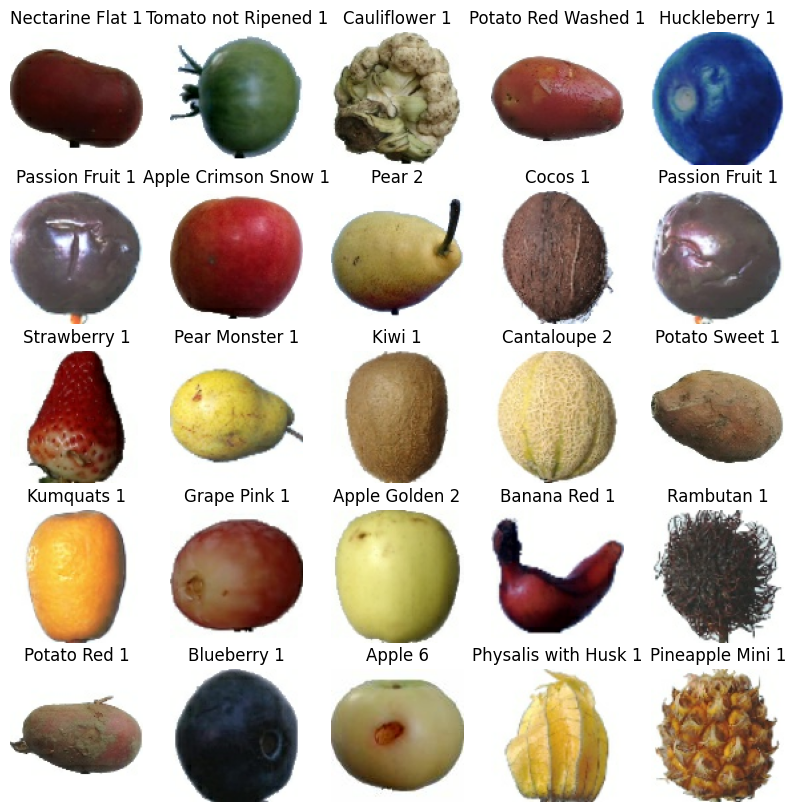

In [10]:
# Function to display images from a dataset
def show_images(dataset, class_names):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  # Take one batch from the dataset
        for i in range(25):  # Display 25 images
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

# Show images from training dataset
show_images(train_ds, class_names)
plt.show()

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory('fruits-360/Training',
                                              target_size=(224, 224),
                                              batch_size=64,
                                               #validation_split=0.2,
                                               subset='training',
   
                                              class_mode='categorical')

val_set = val_datagen.flow_from_directory('fruits-360/Test',
                                          target_size=(224, 224),
                                          batch_size=64,
                                          #validation_split=0.2,
                                          class_mode='categorical')

Found 70491 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.


In [15]:
for data_batch, labels_batch in val_set:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(64, 224, 224, 3)
(64, 141)


In [22]:
# Replace this with the actual path where you saved the weights file
vgg19_weights_path = 'vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Load the pre-trained VGG19 model without the top classification layer
vgg19 = VGG19(input_shape=[224, 224, 3], weights=vgg19_weights_path, include_top=False)

# Add custom layers on top of VGG19
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(train_set.num_classes, activation="softmax"))

model = Model(inputs=vgg19.input, outputs=outputs)

In [23]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

In [24]:
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=8,
    verbose=1,
    
    #validation_steps=len(val_set)
)

Epoch 1/8
  40/1102 ━━━━━━━━━━━━━━━━━━━━ 5:51:13 20s/step - accuracy: 0.0108 - loss: 5.0312

KeyboardInterrupt: 